<a href="https://oilprice.com/"><img src = "../images/bonnylight.jpg" width = 400, align = "center"></a>
# <center>OIL PRICES OF MAJOR CRUDE OIL BENCHMARK(2003 - 2020)</center>

#### About this Notebook
In this notebook, we would use web scrapping technique to extarct the prices of the top three crude oil, i.ie bonny-light benchamarks from 2003 till 2020 for the world. The data is scrapped from different sources including:
1. [WIKIPEDIA source](https://en.wikipedia.org/wiki/List_of_countries_by_oil_production)
2. [OPEC source](https://en.wikipedia.org/wiki/List_of_countries_by_oil_production)
3. [Other source]()
4. [CBN source](https://www.cbn.gov.ng/rates/crudeoil.asp)
5. [Quandl sources](https://www.quandl.com/api/v3/datasets/OPEC/ORB.csv)

The dataset is then cleaned, presented in various visualisation patterns using different visualisation libraries and tools before exporting into a readable format for references (which can be used to build simple-regression or multi-regression models using machine learning techniques).

### TASK(S)
1. EXTRACT THE PRIMARY SELLING PRICE **BRENT CRUDE** FOR THE PERIOD (2000 -  2020)
2. EXTARCT THE PRIMARY SELLING PRICE  **WESTERN TEXAS INTERMIDATE [WTI]**  FOR THE PERIOD (2000 – 2020)
3. EXTARCT THE PRIMARY SELLING PRICE FOR **BONNY LIGHT** FOR THE PERIOD (2000 -  2020)
4. COMBINE THEM FIGURES INTO A **READBLE FORMAT**

### Import dependencies

In [1]:
%matplotlib inline
from datetime import datetime, timedelta
import itertools # 
import matplotlib as mpl #
import matplotlib.pyplot as plt #
import matplotlib.dates as mpl_dates
import numpy as np # imports numpy library
import pandas as pd #imports pandas library
import json # imports json library

### Import general price dataset

In [2]:
# General Price of crude from 2003 - 2020
opec_price_df = pd.read_csv('https://www.quandl.com/api/v3/datasets/OPEC/ORB.csv')
opec_price_df.tail(5)

,Date,Value
4667,2003-01-08,28.86
4668,2003-01-07,29.72
4669,2003-01-06,30.71
4670,2003-01-03,30.83
4671,2003-01-02,30.05


In [3]:
#since we notice it is displaying from the most recent to the former
#let reverse the order of the dataframe (opec_price_df)
rev_opec_price_df=opec_price_df.reindex(index=opec_price_df.index[::-1])
rev_opec_price_df

#then reorder the dataframe
rev_opec_price_df = rev_opec_price_df.reset_index(drop=True)
rev_opec_price_df

,Date,Value
0,2003-01-02,30.05
1,2003-01-03,30.83
2,2003-01-06,30.71
3,2003-01-07,29.72
4,2003-01-08,28.86
...,...,...
4667,2021-02-05,58.92
4668,2021-02-08,59.58
4669,2021-02-09,60.28
4670,2021-02-10,60.45


In [4]:
#rename the column of the dataframe of the (rev_opec_price_df)
rev_opec_price_df = rev_opec_price_df.rename(columns={"Date": "Date(YY/MM/DD)", "Value":"Price($)"} )
rev_opec_price_df.head(2)

,Date(YY/MM/DD),Price($)
0,2003-01-02,30.05
1,2003-01-03,30.83


### Import bonny crude price (daily, weekly, monthly, yearly)

In [121]:
#Import the price of Brent from 2003 -2020
bonny_price_df = pd.read_csv('..\data\BonnyCrudeOilProdPrice09022021.csv')
#display the heading of the record 
bonny_price_df.head(2)

,Year,Month,Crude Oil Price,Production,Crude Oil Export
2006,1,63.85,2.59,2.14,NaN
2006,2,61.33,2.47,2.02,NaN


In [122]:
# Rename Columns for each of the brent Price records
bonny_price_df2=bonny_price_df.rename(columns={"Year": "Date(MM)", "Month":"Price($)",
                                                "Crude Oil Price": "Production(mmbbl/d)", "Production": "Crude Oil Export(mmbbl/d)", 
                                                "Crude Oil Export": "Excess(mmbbl/d)"})
print(bonny_price_df2.head(2))

      Date(MM)  Price($)  Production(mmbbl/d)  Crude Oil Export(mmbbl/d)  \
2006         1     63.85                 2.59                       2.14   
2006         2     61.33                 2.47                       2.02   

      Excess(mmbbl/d)  
2006              NaN  
2006              NaN  


In [123]:
# reset the index columns
bonny_price_df2=bonny_price_df2.rename_axis('Date(YY)').reset_index()

In [124]:
bonny_price_df2.head()

,Date(YY),Date(MM),Price($),Production(mmbbl/d),Crude Oil Export(mmbbl/d),Excess(mmbbl/d)
0,2006,1,63.85,2.59,2.14,NaN
1,2006,2,61.33,2.47,2.02,NaN
2,2006,3,65.00,2.25,1.80,NaN
3,2006,4,72.09,2.32,1.87,NaN
4,2006,5,71.18,2.28,1.83,NaN


In [126]:
# combine the first two datesreset_index
bonny_price_df2['Date(YY/MM)']=bonny_price_df2['Date(YY)'].astype(str)+'-'+bonny_price_df2['Date(MM)'].astype(str)

In [127]:
bonny_price_df2.head()

,Date(YY),Date(MM),Price($),Production(mmbbl/d),Crude Oil Export(mmbbl/d),Excess(mmbbl/d),Date(YY/MM)
0,2006,1,63.85,2.59,2.14,NaN,2006-1
1,2006,2,61.33,2.47,2.02,NaN,2006-2
2,2006,3,65.00,2.25,1.80,NaN,2006-3
3,2006,4,72.09,2.32,1.87,NaN,2006-4
4,2006,5,71.18,2.28,1.83,NaN,2006-5


In [129]:
# Drope some columns
bonny_price_df2.drop(['Date(YY)', 'Date(MM)', 'Production(mmbbl/d)', 'Crude Oil Export(mmbbl/d)', 'Excess(mmbbl/d)'], axis=1, inplace=True)
bonny_price_df2

,Price($),Date(YY/MM)
0,63.85,2006-1
1,61.33,2006-2
2,65.00,2006-3
3,72.09,2006-4
4,71.18,2006-5
...,...,...
173,40.30,2019-6
174,40.30,2020-6
175,44.10,2020-7
176,45.06,2020-8


### Visualisation Summary

#### Plots of Monthly Price of Bonny-Light Oil

In [130]:
# data type of daily brent
print(bonny_price_df2.dtypes)

Price($)       float64
Date(YY/MM)     object
dtype: object


In [131]:
# convert the date column to a usuable format in pandas

bonny_price_df2['Date(YY/MM)']=pd.to_datetime(bonny_price_df2['Date(YY/MM)'])
bonny_price_df2.sort_values('Date(YY/MM)', inplace=True)

# assign the values to be plotted
x=bonny_price_df2['Date(YY/MM)']
y=bonny_price_df2['Price($)']

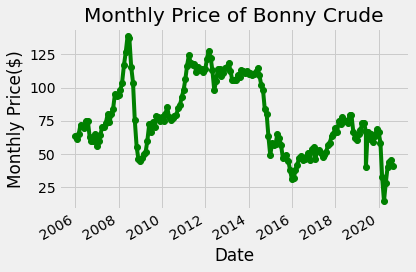

<Figure size 720x1080 with 0 Axes>

In [139]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x, y, color='g', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price of Bonny Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\bonny_monthly.png')
plt.show()

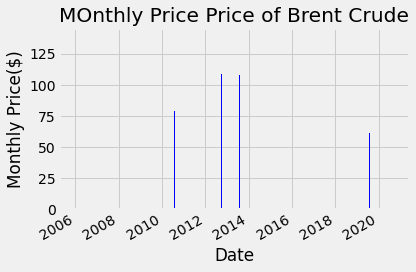

<Figure size 720x1080 with 0 Axes>

In [143]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x, y, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\bonny_monthly-2.png')
plt.show()

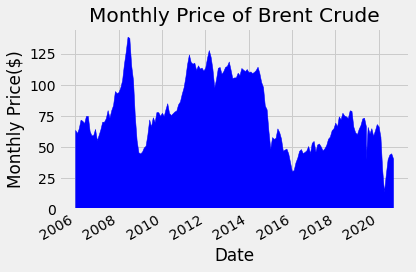

<Figure size 720x1080 with 0 Axes>

In [144]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x, y, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\bonny_monthly-3.png')
plt.show()

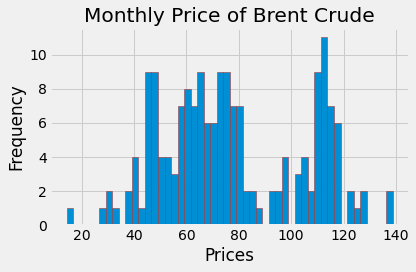

<Figure size 720x1080 with 0 Axes>

In [145]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Monthly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\bonny_monthly-4.png')
plt.show()

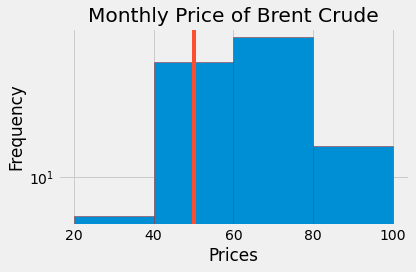

<Figure size 720x1080 with 0 Axes>

In [146]:
# Histogram Plot with specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=50
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Monthly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\bonny_monthly-5.png')
plt.show()

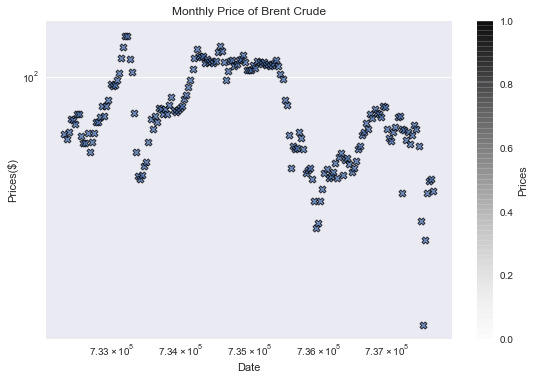

<Figure size 720x1080 with 0 Axes>

In [148]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x, y, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Monthly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\bonny_monthly-6.png')
plt.show()

### Mathematical Operations

In [150]:
# describe the daily dataset
bonny_price_df2.describe()

,Price($)
count,178.000000
mean,77.498371
std,26.766663
min,14.280000
25%,57.610000
50%,73.315000
75%,105.317500
max,138.740000


In [151]:
# Mean of Monthly Price of Brent Crude
bonny_price_df2["Price($)"].mean()

77.49837078651683

In [142]:
# Max and Min Value of Daily Brent 
max_daily = brent_price_daily_df2["Price($)"].max()
print(max_daily)

min_daily = brent_price_daily_df2["Price($)"].min()
print(min_daily)

143.95
9.1


In [143]:
# Max and Min Value of Weekly Brent 
max_weekly = brent_price_weekly_df2["Price($)"].max()
print(max_weekly)

min_weekly = brent_price_weekly_df2["Price($)"].min()
print(min_weekly)

141.07
9.44


In [144]:
# Max and Min Value of Monthly Brent 
max_monthly= brent_price_monthly_df2["Price($)"].max()
print(max_monthly)

min_monthly = brent_price_monthly_df2["Price($)"].min()
print(min_monthly)

132.72
9.82


In [145]:
# Max and Min Value of Daily Brent 
max_yearly = brent_price_yearly_df2["Price($)"].max()
print(max_yearly)

min_yearly = brent_price_yearly_df2["Price($)"].min()
print(min_yearly)

111.63
12.76


### Inferences and Recommendation

[Click here to read from this file](https://wwww.google.drive)

In [ ]:
### Export cleaned dataset
df.to_xlxs("../")

### Created by **@chisomloius**